# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.

1. Strong positive correlation: With a correlation coefficient of 0.84, there is a strong positive correlation between mouse weight and average observed tumor volume for the Capomulin regimen. This indicates that as mouse weight increases, the average tumor volume tends to increase as well.

2. Linear relationship: The regression equation y = 0.95x + 21.55 represents the linear relationship between mouse weight (x) and average observed tumor volume (y) for the Capomulin regimen. The positive slope of 0.95 indicates that for every unit increase in mouse weight, the average tumor volume is expected to increase by approximately 0.95 units.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
print(combined_data.head())



  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  


In [2]:
# Checking the number of mice.
num_mice = combined_data["Mouse ID"].nunique()

# Print the number of mice
print("Number of mice:", num_mice)


Number of mice: 249


In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Find the duplicate Mouse IDs
duplicate_ids = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()

# Print the duplicate Mouse IDs and their datatype
for id in duplicate_ids:
    datatype = combined_data.loc[combined_data['Mouse ID'] == id, 'Mouse ID'].dtype
    print(f"Mouse ID: {id}, Datatype: {datatype}")


Mouse ID: g989, Datatype: object


In [8]:
# Find the duplicate Mouse ID
duplicate_id = 'g989'

# Get all the data for the duplicate Mouse ID
duplicate_data = combined_data.loc[combined_data['Mouse ID'] == duplicate_id]

# Print the duplicate data
print(duplicate_data)


    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392                 0  
912           51.745156                 0  


In [11]:
# Find the duplicate Mouse ID
duplicate_id = 'g989'

# Create a clean DataFrame by dropping the rows with the duplicate Mouse ID
clean_data = combined_data.loc[combined_data['Mouse ID'] != duplicate_id]

# Print the clean DataFrame
print(clean_data)


     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [12]:
# Checking the number of mice in the clean DataFrame.
num_mice_clean = clean_data['Mouse ID'].nunique()
print(f"Number of mice in the clean DataFrame: {num_mice_clean}")


Number of mice in the clean DataFrame: 248


## Summary Statistics

In [15]:

# Group the data by regimen and calculate the summary statistics
summary_stats = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename the columns in the summary statistics table
summary_stats = summary_stats.rename(columns={'mean': 'Mean', 'median': 'Median', 'var': 'Variance', 'std': 'Standard Deviation', 'sem': 'SEM'})

# Display the summary statistics table
print(summary_stats)


                   Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.320930  50.446266  43.852013            6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


In [18]:
# dont understand


                   Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.320930  50.446266  43.852013            6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


## Bar and Pie Charts

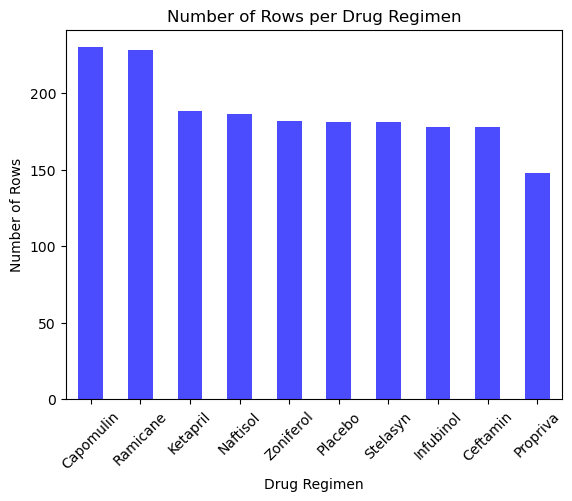

In [19]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Count the occurrences of each drug regimen
counts = clean_data['Drug Regimen'].value_counts()

# Create a bar plot
counts.plot(kind='bar', color='blue', alpha=0.7)

# Set the plot title and axis labels
plt.title('Number of Rows per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.show()


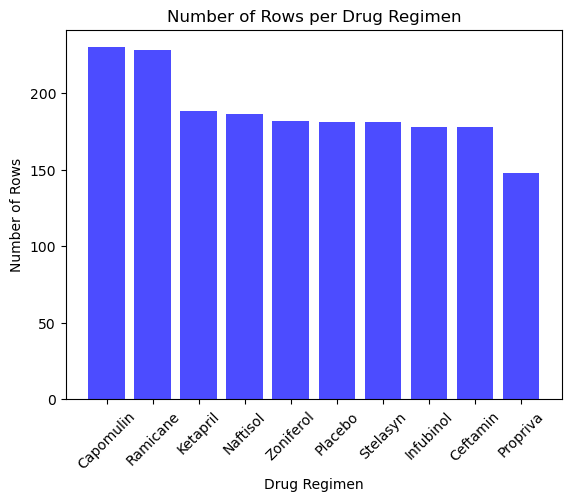

In [20]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
import matplotlib.pyplot as plt

# Count the occurrences of each drug regimen
counts = clean_data['Drug Regimen'].value_counts()

# Get the drug regimens and their corresponding counts
drug_regimens = counts.index
row_counts = counts.values

# Create a bar plot
plt.bar(drug_regimens, row_counts, color='blue', alpha=0.7)

# Set the plot title and axis labels
plt.title('Number of Rows per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.show()


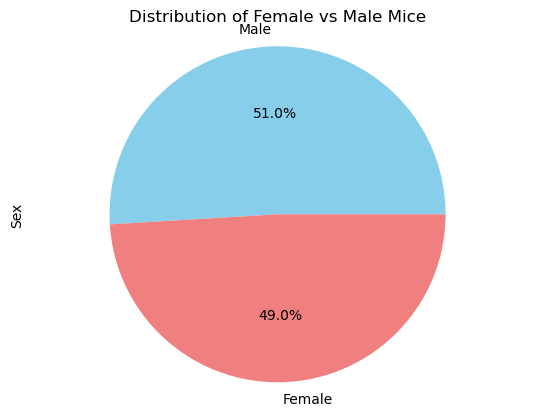

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
import pandas as pd
import matplotlib.pyplot as plt

# Count the occurrences of each gender
gender_counts = clean_data['Sex'].value_counts()

# Create a pie plot
gender_counts.plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])

# Set the plot title
plt.title('Distribution of Female vs Male Mice')

# Set the aspect ratio to be equal so that the pie is circular
plt.axis('equal')

# Display the plot
plt.show()


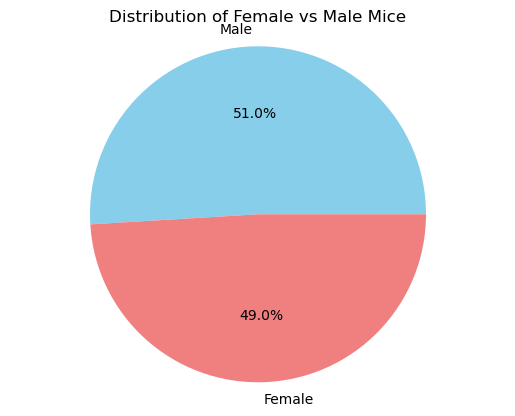

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
import pandas as pd
import matplotlib.pyplot as plt

# Count the occurrences of each gender
gender_counts = clean_data['Sex'].value_counts()

# Create a pie plot
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])

# Set the plot title
plt.title('Distribution of Female vs Male Mice')

# Set the aspect ratio to be equal so that the pie is circular
plt.axis('equal')

# Display the plot
plt.show()


## Quartiles, Outliers and Boxplots

In [23]:
# List of the four treatment regimens
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Filter the clean_data DataFrame for the four treatment regimens
filtered_data = clean_data[clean_data['Drug Regimen'].isin(treatment_regimens)]

# Find the maximum timepoint for each mouse
max_timepoints = filtered_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge the max_timepoints DataFrame with the original clean_data DataFrame
merged_data = pd.merge(max_timepoints, clean_data, on=['Mouse ID', 'Timepoint'], how='left')

# Select the 'Mouse ID', 'Drug Regimen', and 'Tumor Volume (mm3)' columns
final_tumor_volume = merged_data[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]

# Display the final tumor volume of each mouse
print(final_tumor_volume.head())


  Mouse ID Drug Regimen  Tumor Volume (mm3)
0     a203    Infubinol           67.973419
1     a251    Infubinol           65.525743
2     a275     Ceftamin           62.999356
3     a411     Ramicane           38.407618
4     a444     Ramicane           43.047543


Treatment Regimen: Capomulin
IQR: 7.314067135000002
Potential Outliers: 18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64
-------------------------------------
Treatment Regimen: Ramicane
IQR: 8.325365415
Potential Outliers: 9    22.050126
Name: Tumor Volume (mm3), dtype: float64
-------------------------------------
Treatment Regimen: Infubinol
IQR: 10.002090667500006
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
-------------------------------------
Treatment Regimen: Ceftamin
IQR: 9.593010457500007
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
-------------------------------------


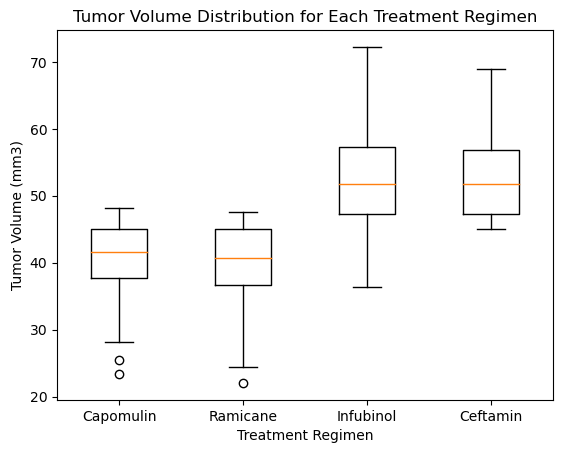

In [24]:
# List of the four treatment regimens
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Empty list to store tumor volume data
tumor_vol_data = []

# Calculate IQR and potential outliers for each treatment regimen
for treatment in treatments:
    # Filter the clean_data DataFrame for the current treatment regimen
    treatment_data = clean_data.loc[clean_data['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Append the tumor volume data to the list
    tumor_vol_data.append(treatment_data)
    
    # Calculate the quartiles (Q1, Q3) and IQR for the current treatment regimen
    q1 = treatment_data.quantile(0.25)
    q3 = treatment_data.quantile(0.75)
    iqr = q3 - q1
    
    # Calculate the upper and lower bounds for potential outliers
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    
    # Determine potential outliers for the current treatment regimen
    outliers = treatment_data.loc[(treatment_data > upper_bound) | (treatment_data < lower_bound)]
    
    # Print the treatment regimen, IQR, and potential outliers
    print(f"Treatment Regimen: {treatment}")
    print(f"IQR: {iqr}")
    print(f"Potential Outliers: {outliers}")
    print("-------------------------------------")

# Plot the tumor volume data for each treatment regimen
plt.boxplot(tumor_vol_data, labels=treatments)
plt.xlabel("Treatment Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume Distribution for Each Treatment Regimen")
plt.show()



## Line and Scatter Plots

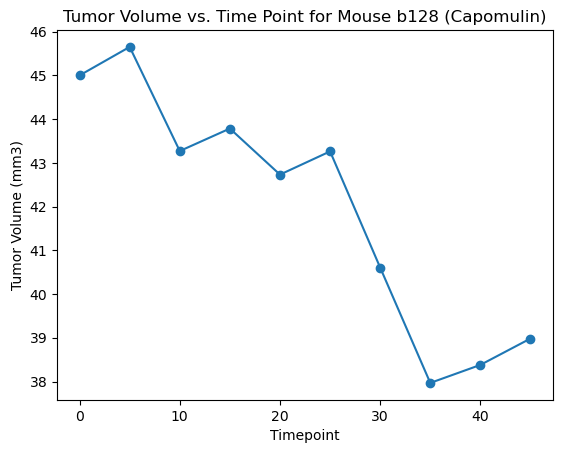

In [26]:
# Choose a mouse ID treated with Capomulin
mouse_id = 'b128'

# Select the data for the chosen mouse treated with Capomulin
mouse_data = clean_data.loc[(clean_data['Drug Regimen'] == 'Capomulin') & (clean_data['Mouse ID'] == mouse_id), ['Timepoint', 'Tumor Volume (mm3)']]

# Create a line plot
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o')

# Set the labels and title
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f"Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin)")

# Show the plot
plt.show()


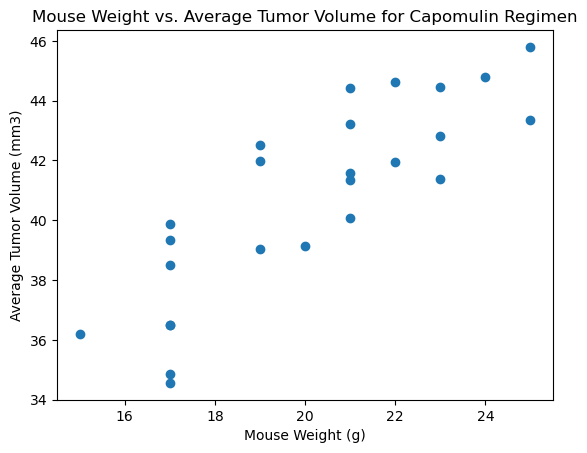

In [27]:
# Filter the data for Capomulin regimen
capomulin_data = clean_data.loc[clean_data['Drug Regimen'] == 'Capomulin']

# Group the data by Mouse ID and calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge the mouse weight information with the average tumor volume data
mouse_weight = mouse_metadata.set_index('Mouse ID')['Weight (g)']
merged_data = pd.merge(average_tumor_volume, mouse_weight, on='Mouse ID')

# Create a scatter plot
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])

# Set the labels and title
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')

# Show the plot
plt.show()


## Correlation and Regression

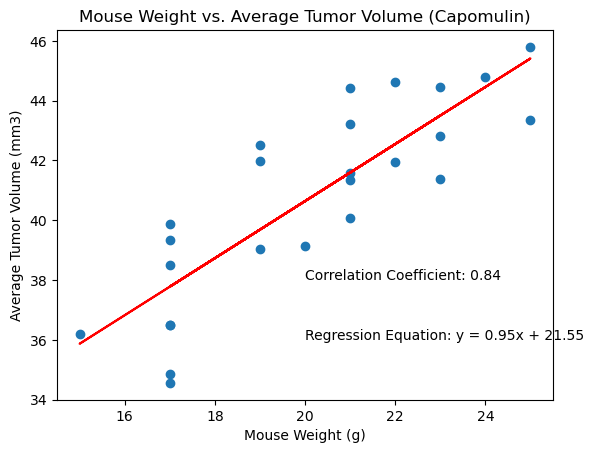

In [29]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Get the mouse weight and average tumor volume data for Capomulin regimen
capomulin_data = clean_data.loc[clean_data['Drug Regimen'] == 'Capomulin']
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = mouse_metadata.set_index('Mouse ID')['Weight (g)']
merged_data = pd.merge(average_tumor_volume, mouse_weight, on='Mouse ID')

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])

# Create scatter plot
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])

# Add linear regression line
regression_values = merged_data['Weight (g)'] * slope + intercept
plt.plot(merged_data['Weight (g)'], regression_values, color='red')

# Set plot labels and title
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)')

# Display correlation coefficient and linear regression equation on the plot
plt.text(20, 38, f'Correlation Coefficient: {correlation_coefficient:.2f}')
plt.text(20, 36, f'Regression Equation: y = {slope:.2f}x + {intercept:.2f}')

# Show the plot
plt.show()

